**Import dependancies**

In [29]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics
import matplotlib.pyplot as plt
import numpy

**Import the dataset**

In [30]:
dataSet = pandas.read_csv("z-AssignmentTrainingData100-JamieComplex.csv")
#print(dataSet)

**Convert non-numerical fields to numerical values**

In [31]:
convert = {True: 1, False: 0}
dataSet['SuccessTF'] = dataSet['SuccessTF'].map(convert)
#print(dataSet)

**Divide the data into features (Attributes), and output (labels)**

In [32]:
features = ['OvertakingSpeedMPS', 'OncomingSpeedMPS', 'InitialSeparationM']
input = dataSet[features]
output = dataSet['SuccessTF']
#print(input)
#print(output)

**SKLEARN has the ability to automtically split dataset into training and testing data**

In [33]:
from sklearn.model_selection import train_test_split
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2, random_state=0)

**Now create the tree and train the model**

In [34]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(input, output)

**Now plot the tree into readable form.**
    <br> > The top label shows what feature it is splitting on, and the value it is splitting at
    <br> > The second label is the entropy value, 0.0 = all items got the same result, 0.5 = items were split 50/50
    <br> > The third label is the total number of items being looked at
    <br> > The bottom label is the result of the split, number of items that went each side

[Text(0.5, 0.9285714285714286, 'InitialSeparationM <= 190.6\ngini = 0.48\nsamples = 100\nvalue = [40, 60]'),
 Text(0.2631578947368421, 0.7857142857142857, 'OncomingSpeedMPS <= 20.85\ngini = 0.368\nsamples = 37\nvalue = [28, 9]'),
 Text(0.15789473684210525, 0.6428571428571429, 'OvertakingSpeedMPS <= 21.1\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.10526315789473684, 0.5, 'OvertakingSpeedMPS <= 20.3\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05263157894736842, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.15789473684210525, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21052631578947367, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3684210526315789, 0.6428571428571429, 'OvertakingSpeedMPS <= 20.15\ngini = 0.18\nsamples = 30\nvalue = [27, 3]'),
 Text(0.3157894736842105, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.42105263157894735, 0.5, 'OncomingSpeedMPS <= 21.9\ngini = 0.069\nsamples = 28\

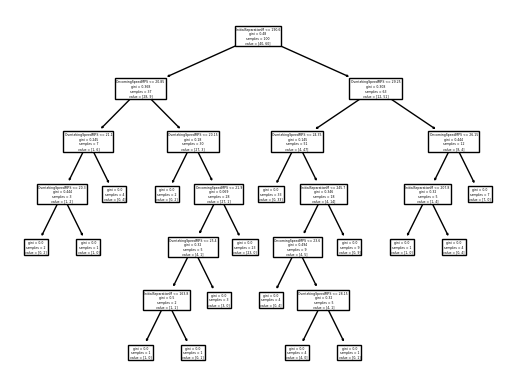

In [35]:
tree.plot_tree(dtree, feature_names=features)

**Use the model to test predict new things**

In [36]:
outcome = dtree.predict(input_test)
print('Predicted Output: ', outcome)
print('Expected Output:  ', output_test.to_numpy())

Predicted Output:  [1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1]
Expected Output:   [1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1]


**Evaluate how good the algorithm is:**
<br>For regression problems you can use metrics to evaluate an algorithm:
- mean absolute error (expect to be within 10% of range of values)
- root mean squared error (expect to be within 10% of average)

In [37]:
mae = metrics.mean_absolute_error(output_test, outcome)
print('Mean Absolute Error:', mae)
maeCheck = (max(output_test)-min(output_test))*0.1
if mae > maeCheck:
    print('\033[91m'+'MAE indicates your algorithm needs improving'+'\033[0m')


evalValue = numpy.sqrt(metrics.mean_squared_error(output_test, outcome))
print('Root Mean Squared Error:', evalValue)
avgOutput = numpy.average(output)
if evalValue > avgOutput*0.1:
    print('\033[91m'+'RSME indicates your algorithm needs improving'+'\033[0m')

Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0


**Now finally use the model to predict an actual result**
<br>Set your prediction data, you can do it manually or use a dataframe to avoid user warnings

In [38]:
predictData = pandas.DataFrame(columns=features, index=[0])
predictData.loc[0] = pandas.Series({'OvertakingSpeedMPS': 30.3, 'OncomingSpeedMPS': 29.5, 'InitialSeparationM': 247.7})
#expect false

outcome = dtree.predict(predictData)
print(outcome)

[0]


**Round the result in case its not a whole number before convert to normal text**
<br>`def` is short for definition - it is the python way of defining a method/function

In [39]:
def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return numpy.floor(n*multiplier + 0.5) / multiplier

outcome = round_half_up(outcome, decimals=0)
print(outcome)

[0.]


**Now convert to text and give an output**

In [40]:
if outcome == 0:
    print('\033[91m'+'\033[1m'+'I recommend you DO NOT overtake.'+'\033[0m')
elif outcome == 1:
    print('\033[92m'+'\033[1m'+'You can safely overtake.'+'\033[0m')
else:
    print('\033[96m'+'\033[1m'+'The outcome is unknown. Proceed at your own risk.'+'\033[0m')

I recommend you DO NOT overtake.
